# Parametrización 

In [1]:
#Importar paquetes
import pandas as pd
import numpy as np
import re

In [2]:
#Dataframes
audibleTabla=pd.DataFrame()
autoresPorAudibleTabla=pd.DataFrame()
narradorPorAudibleTabla=pd.DataFrame()
audibleLimpioTabla=pd.DataFrame
#Listas
nombreNarradoresPorAudibleLista=[]
nombreAutoresPorAudibleLista=[]
indexAudible=[]
duracionPorAudibleLista=[]
estrellasCalificadasPorAudibleLista=[]
cantidadCalificacionesPorAudibleLista=[]

# Carge de datos

In [3]:
audibleTabla=pd.read_csv('audible_uncleaned.csv')

# Exploración

In [4]:
audibleTabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [5]:
audibleTabla.author.value_counts()

Writtenby:矢島雅弘,石橋遊                                              874
Writtenby:SmartReading                                          405
Writtenby:中西貴之,BJ                                               311
Writtenby:div.                                                  274
Writtenby:OnlineStudioProductions                               212
                                                               ... 
Writtenby:AlessandroGoglio,AndreaGoldstein                        1
Writtenby:DianaThomas,StaceyBoyle                                 1
Writtenby:KarieWillyerd,BarbaraMistick,JosephGrenny-foreword      1
Writtenby:FrancesKay                                              1
Writtenby:StephenO'Shea                                           1
Name: author, Length: 48374, dtype: int64

In [6]:
audibleTabla.narrator.value_counts()

Narratedby:anonymous                      1034
Narratedby:矢島雅弘,石橋遊                        874
Narratedby:Intuitive                       465
Narratedby:uncredited                      326
Narratedby:中西貴之,BJ                         311
                                          ... 
Narratedby:HannahB.                          1
Narratedby:DavidSimonM.D.,DeepakChopra       1
Narratedby:CorinneZupko                      1
Narratedby:SandraIngerman                    1
Narratedby:ChrisStewart                      1
Name: narrator, Length: 29717, dtype: int64

In [7]:
audibleTabla.time.value_counts()

2 mins                372
6 mins                369
5 mins                369
7 mins                356
4 mins                347
                     ... 
32 hrs and 16 mins      1
41 hrs and 16 mins      1
35 hrs and 48 mins      1
30 hrs and 15 mins      1
24 hrs and 4 mins       1
Name: time, Length: 2284, dtype: int64

In [8]:
audibleTabla.language.value_counts()

English             61884
german               8295
spanish              3496
japanese             3167
italian              2694
french               2386
russian              1804
danish                935
portuguese            526
swedish               515
Hindi                 436
polish                224
finnish               197
dutch                 190
tamil                 161
catalan               153
mandarin_chinese       97
icelandic              52
romanian               50
hungarian              36
urdu                   34
afrikaans              28
czech                  23
turkish                20
greek                  18
arabic                 16
norwegian              16
galician               10
bulgarian               9
korean                  4
slovene                 4
hebrew                  2
basque                  2
telugu                  2
lithuanian              2
ukrainian               1
Name: language, dtype: int64

In [9]:
audibleTabla.stars.value_counts()

Not rated yet                    72417
5 out of 5 stars1 rating          3739
4 out of 5 stars1 rating          1254
5 out of 5 stars2 ratings          998
4.5 out of 5 stars2 ratings        661
                                 ...  
3.5 out of 5 stars61 ratings         1
5 out of 5 stars321 ratings          1
5 out of 5 stars93 ratings           1
4.5 out of 5 stars747 ratings        1
4 out of 5 stars76 ratings           1
Name: stars, Length: 665, dtype: int64

In [10]:
audibleTabla.price.value_counts()

586.00      5533
668.00      4262
703.00      3588
836.00      2704
820.00      2458
            ... 
2,631.00       1
2,764.00       1
895.00         1
364.00         1
544.00         1
Name: price, Length: 1011, dtype: int64

# Transformación de columnas

Se identifica que la columna "author" contiene un listado de autores por audible, se realiza la separación de los nombres, finalmente estos se almacenan en un nuevo dataframe.

In [11]:
for i in audibleTabla.index:
    for autor in audibleTabla.author[i].split('Writtenby:')[1].split(','):
        nombreAutoresPorAudibleLista.append(autor)
        indexAudible.append(i)

autoresPorAudibleTabla=pd.DataFrame(zip(indexAudible,nombreAutoresPorAudibleLista),columns=['indexAudible','nombreAutor'])

Se identifica que la columna "narrator" contiene un listado de narradores por audible, se realiza la separación de los nombres, finalmente estos se almacenan en un nuevo dataframe.

In [12]:
for i in audibleTabla.index:
    for narrador in audibleTabla.narrator[i].split('Narratedby:')[1].split(','):
        nombreNarradoresPorAudibleLista.append(narrador)
        indexAudible.append(i)

narradorPorAudibleTabla=pd.DataFrame(zip(indexAudible,nombreNarradoresPorAudibleLista),columns=['idAudible','nombreNarrador'])

Se identifica que la columna "time" contiene la duracion del audible como un texto, se convierte a un formato apropiado a su naturaleza y se asigna este nuevo formato a una columna adicional.

In [13]:
for i in audibleTabla.index:
    singularDuracion=audibleTabla.time[i].replace('s','')
    if re.match('(\d+)\s*hr\s*and\s*(\d+)\s*min',singularDuracion)!=None:
        m=re.match('(\d+)\s*hr\s*and\s*(\d+)\s*min',singularDuracion)
        duracionPorAudibleLista.append(pd.Timedelta(hours=int(m.group(1)),minutes=int(m.group(2))))
    elif re.match('(\d+)\s*min',singularDuracion)!=None:
        m=re.match('(\d+)\s*min',singularDuracion)
        duracionPorAudibleLista.append(pd.Timedelta(minutes=int(m.group(1))))
    elif re.match('(\d+)\s*hr',singularDuracion)!=None:
        m=re.match('(\d+)\s*hr',singularDuracion)
        duracionPorAudibleLista.append(pd.Timedelta(hours=int(m.group(1))))
    elif singularDuracion=='Le than 1 minute':
        duracionPorAudibleLista.append(pd.Timedelta(seconds=59))
        
audibleTabla['duracion']=duracionPorAudibleLista

Se identifica que la columna "dateRelease" contiene la fecha de lanzamiento del audible como un texto, se convierte a un formato apropiado a su naturaleza y se asigna este nuevo formato a una columna adicional.

In [14]:
audibleTabla['fechaLanzamiento']=pd.to_datetime(audibleTabla.releasedate)

Se identifica que la columna "stars" contiene la cantidad de estrellas calificadas por audible y tambien la cantidad de evaluaciones realizadas, se realiza la separación entre las estrellas calificadas y el total de calificaciones realizadas, finalmente cada una de estas variables se almacenan en una nueva columna independiente.

In [15]:
for i in audibleTabla.index:
    singularEstrellas=audibleTabla.stars[i].replace('ratings','rating')
    if re.match('(\d+(\.\d+)?)\s*out of\s*5\s*stars(\d+)\s*rating',singularEstrellas)!=None:
        m=re.match('(\d+(\.\d+)?)\s*out of\s*5\s*stars(\d+)\s*rating',singularEstrellas)
        estrellasCalificadasPorAudibleLista.append(float(m.group(1)))
        cantidadCalificacionesPorAudibleLista.append(float(m.group(3)))
    elif re.match('(\d+(\.\d+)?)\s*out of\s*5\s*stars([\d,]+)\s*rating',singularEstrellas)!=None:
        m=re.match('(\d+(\.\d+)?)\s*out of\s*5\s*stars([\d,]+)\s*rating',singularEstrellas)
        estrellasCalificadasPorAudibleLista.append(float(m.group(1)))
        cantidadCalificacionesPorAudibleLista.append(float(m.group(3).replace(',','')))
    elif singularEstrellas=='Not rated yet':
        estrellasCalificadasPorAudibleLista.append(np.nan)
        cantidadCalificacionesPorAudibleLista.append(np.nan)

audibleTabla['estrellasCalificadas']=estrellasCalificadasPorAudibleLista
audibleTabla['cantidadCalificaciones']=cantidadCalificacionesPorAudibleLista

Se identifica que la columna precio es del tipo texto, se realiza el ajuste al tipo numerico

In [16]:
audibleTabla.price=audibleTabla.price.apply(lambda x: x.replace('Free','0'))
audibleTabla.price=audibleTabla.price.apply(lambda x: x.replace(',',''))
audibleTabla.price=audibleTabla.price.astype(float)

# Validación de cambios

In [17]:
audibleLimpioTabla=audibleTabla[['name', 'language', 'price','duracion','fechaLanzamiento','estrellasCalificadas','cantidadCalificaciones']].rename(columns={'name':'nombreAudible', 'language':'idioma', 'price':'precio'})

In [18]:
audibleLimpioTabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   nombreAudible           87489 non-null  object         
 1   idioma                  87489 non-null  object         
 2   precio                  87489 non-null  float64        
 3   duracion                87489 non-null  timedelta64[ns]
 4   fechaLanzamiento        87489 non-null  datetime64[ns] 
 5   estrellasCalificadas    15072 non-null  float64        
 6   cantidadCalificaciones  15072 non-null  float64        
dtypes: datetime64[ns](1), float64(3), object(2), timedelta64[ns](1)
memory usage: 4.7+ MB


<AxesSubplot:>

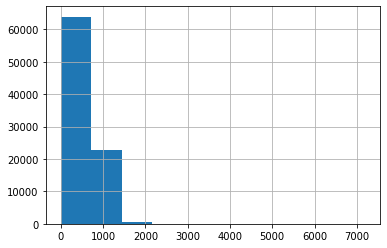

In [19]:
audibleLimpioTabla.precio.hist()

In [20]:
audibleLimpioTabla.duracion.describe()

count                        87489
mean     0 days 06:57:29.859056567
std      0 days 06:04:33.564741294
min                0 days 00:00:59
25%                0 days 02:22:00
50%                0 days 06:26:00
75%                0 days 09:44:00
max                5 days 23:15:00
Name: duracion, dtype: object

<AxesSubplot:>

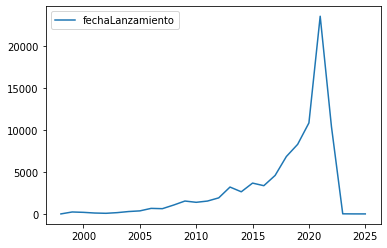

In [21]:
audibleLimpioTabla.fechaLanzamiento.dt.year.value_counts().sort_index().to_frame().plot.line()

In [22]:
audibleLimpioTabla[['estrellasCalificadas','cantidadCalificaciones']].describe()

,estrellasCalificadas,cantidadCalificaciones
count,15072.00000,15072.000000
mean,4.45694,21.613190
std,0.72394,207.479634
min,1.00000,1.000000
25%,4.00000,1.000000
50%,4.50000,2.000000
75%,5.00000,7.000000
max,5.00000,12573.000000


<AxesSubplot:xlabel='estrellasCalificadas', ylabel='cantidadCalificaciones'>

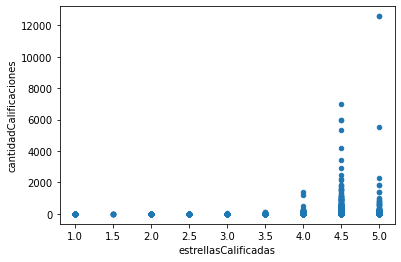

In [23]:
audibleLimpioTabla.plot.scatter(x='estrellasCalificadas',y='cantidadCalificaciones')